In [1]:
%load_ext autoreload
%autoreload 2

import os
import glob
import pathlib
import sys
import argparse
import warnings
import h5py
import numpy as np
import yt
import matplotlib
import time
import scipy
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
from matplotlib import rcParams
import multiprocessing
from multiprocessing import Process, Lock, Array

sys.path.append("/Users/hyw/erm/ppscript/vis/python/")
import bin_convert as bc


plt.style.use('ncr-paper.mplstyle')
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["Computer Modern Sans Serif"]})



### File Converter: from binary to athdf

In [2]:
# binary_fname = "/Users/hyw/erm/athena_bhl_test/test-2/torus.mhd_w_bcc.00198.bin"
from pathlib import Path

# directory_path = Path('/Users/hyw/erm/athena_bhl_test/test/')
# directory_path = Path('/Users/hyw/Desktop/ERM/athenak-erm/out/bin/')
directory_path = Path('/Users/hyw/erm/athena_bhl_test/athenak_lbox-1/')
directory_path = Path('/Users/hyw/Desktop/ERM/athenak-erm/build/src/output/bin/')
directory_path = Path('/Users/hyw/Desktop/ERM/athenak-erm/build/src/1gpu_1orbit/bin/')
directory_path = Path('/Users/hyw/erm/out_2gpu_1000/bin/')
directory_path = Path('/Users/hyw/erm/out_2gpu_wenoz/bin/')
directory_path = Path('/Users/hyw/erm/out_2gpu_llf/bin/')
directory_path = Path('/Users/hyw/erm/rk3_wenoz_hllc_2d/bin/')
directory_path = Path('/Users/hyw/erm/rk3_roe_low_2d/')
directory_path = Path('/Users/hyw/erm/epsilon0.1/')
directory_path = Path('/Users/hyw/Desktop/ERM/athenak-erm/build-scaf/src/out/bin/')
directory_path = Path('/Users/hyw/Desktop/ERM/athenak-erm/build-scaf/src/anta-scaf/')
directory_path = Path('/Users/hyw/Desktop/ERm/athenak-erm/build-cbd/src/bin/')
directory_path = Path('/Users/hyw/Desktop/ERm/athenak-erm/build-mdisk/src/mhdtest/bin/high-beta/')
directory_path = Path('/Users/hyw/athenak/hydro-test/src/testmb/lowreso/')
# directory_path = Path('/Users/hyw/lisa/')
# directory_path = Path('/Users/hyw/athenak/lisa/src/testmb/bin/')
# directory_path = Path('/Users/hyw/erm/data/perl/test/')

# directory_path = Path('/Users/hyw/mdisk/mdisk/src/test/bin/')
# directory_path = Path('/Users/hyw/athenak/gr_torus/src/testmb/bin/')

# directory_path = Path('/Users/hyw/Desktop/ERm/athenak-erm/build-mdisk/src/test/bin/')
# directory_path = Path('/Users/hyw/Desktop/ERm/athenak-erm/build-mdisk/src/cbdi/bin/')
# directory_path = Path('/Users/hyw/Desktop/ERm/athenak-erm/build-mdisk/src/cbd-23.3.6-crash_eos/bin/')
# directory_path = Path('/Users/hyw/erm/data/mhdtest/')
directory_path = Path('/Users/hyw/CBD_Summit/')
directory_path = Path('/Users/hyw/24.6.1-test/')
# directory_path = Path('/Users/hyw/Desktop/ERm/athenak-erm/build-scaf/src/anta-scaf/bin/')

# directory_path = Path('/Users/hyw/Desktop/ERM/athenak-erm/build-mdisk/src/cbd/bin')
# directory_path = Path('/Users/hyw/Desktop/ERM/athenak-erm/build-3dhydro/src/cbd2d/bin')

# directory_path = Path('/Users/hyw/Desktop/ERM/athenak-erm/2f/src/2f/bin')
# directory_path = Path('/Users/hyw/Desktop/ERM/athenak/fm/src/fmtest/bin')

# directory_path = Path('/Users/hyw/Desktop/ERM/scaf/scaf/src/test/bin')
# directory_path = Path('/Users/hyw/erm/data/scaf/bin')


extension = '.bin'



for file_path in directory_path.iterdir():
    if file_path.is_file() and file_path.suffix == extension:
        print(file_path)
        binary_fname = str(file_path)
        athdf_fname = binary_fname.replace(".bin", ".athdf")
        xdmf_fname = athdf_fname + ".xdmf"
        filedata = bc.read_binary(binary_fname)
        bc.write_athdf(athdf_fname, filedata)
        bc.write_xdmf_for(xdmf_fname, os.path.basename(athdf_fname), filedata)

/Users/hyw/24.6.1-test/cbd.mhd_w_bcc.00008.bin


In [28]:
import imageio        
filenum = [301+i for i in range(0,200,1)]
TimeLabel = [3000.05+(TimeTemp-301)*0.05 for i,TimeTemp in enumerate(filenum)]
# filenum = [i for i in range(90)]
# TimeLabel = [TimeTemp*10.0 for i,TimeTemp in enumerate(filenum)]

def create_gif(image_list, gif_name, myduration):
    frames = []
    imageID = 0
    for image_name in image_list:
        frames.append(imageio.imread(image_name))
        print(imageID, end='') 
        imageID = imageID+1
    imageio.mimsave(gif_name, frames, 'GIF', fps=3,duration = 5)
    return
    
def main(**kwargs):

    gif_name = '/Users/hyw/Desktop/lisa/test.gif'
    # fileList = os.listdir("./beta2/")
    image_list = list()
    
    for file in range(1,21):
        label=str(file)
    #     if 0<=file and 10>file:
    #         ID = '0000'+str(file)
    #     elif 10<=file and 100>file:
    #         ID = '000'+str(file)
    #     elif 100<=file and 1000>file:
    #         ID = '00'+str(file)
    #     filename = "cart.out1."+ID+".athdf"
    #     label = "{:.2f}".format(TimeLabel[ifile])
#         image_list.append('/Users/atonement0721/Desktop/CodeComp/Notebook/movie/t0n0b4.0-'+label+'.png')
        image_list.append('/Users/hyw/Desktop/lisa/'+label+'.png')
    
    myduration = 0.001
    create_gif(image_list, gif_name, 0.01)
    
main()


/var/folders/vg/zvs06sj138zdhlws5nv25dph0000gn/T/ipykernel_7765/1842555203.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(image_name))


012345678910111213141516171819

In [46]:
M_sun = 1.989e30
G = 6.67430e-11
c = 299792458
AU = 149597870700
pc = 3.085677581467192e16
kpc = 3.085677581467192e19
Mpsr = 1.4 * M_sun
Tpsr = 2.4*60*60 

T_inspiral = (5.0/16.0) *(4*np.pi**2)**1.333 * c**5 * G**(-0.666) * Tpsr**(8.0/3.0) * Mpsr**(-0.666)
T_inspiral = T_inspiral/(60*60*24*365.25)
#/(5.0/256.0)*(c**5/G**3)*(1.0/(np.pi**8))*(M_sun**2/Mpsr**2)*(1.0/AU)**4
print(T_inspiral)

3.2055372571362335e+33


In [47]:
M_smbh = 1e8 * M_sun
R_smbh = 2.0 * G * M_smbh / c**2
f = np.sqrt(G*M_smbh/R_smbh**3)/np.pi

D = 1e9*kpc
v = np.sqrt(G*M_smbh/R_smbh)
h = (G*M_smbh/c**2) * 1.0/D * (v/c)**2
print (h)

2.393418039524047e-18


In [48]:
M_un = c**3/(8**0.5*G*200*np.pi)
print(M_un/M_sun)

114.20805624269445


In [49]:
R_un = 2*G*M_un/c**2
Lgw = 8/5.0 * M_un**5/R_un**3 * 4.0*10**38

D_ = 4e3*kpc
LL = Lgw/(D_**2)
print(LL)

6.616662867821487e+137


In [50]:
# binary_fname = "/Users/hyw/erm/athena_bhl_test/test-2/torus.mhd_w_bcc.00198.bin"
from pathlib import Path

# directory_path = Path('/Users/hyw/erm/athena_bhl_test/test/')
# directory_path = Path('/Users/hyw/Desktop/ERM/athenak-erm/out/bin/')
directory_path = Path('/Users/hyw/erm/athena_bhl_test/athenak_lbox-1/')
extension = '.bin'

for file_path in directory_path.iterdir():
    if file_path.is_file() and file_path.suffix == extension:
        print(file_path)
        binary_fname = str(file_path)
        athdf_fname = binary_fname.replace(".bin", ".athdf")
        xdmf_fname = athdf_fname + ".xdmf"
        filedata = bc.read_binary(binary_fname)
        bc.write_athdf(athdf_fname, filedata)
        bc.write_xdmf_for(xdmf_fname, os.path.basename(athdf_fname), filedata)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hyw/erm/athena_bhl_test/athenak_lbox-1'

In [ ]:
MDMcc = 2.0*10**30.0*299792458**2
mDMcc = 100*1.60218e-10
print(mDMcc)
N = MDMcc/mDMcc

kpc = 3.086e+19
R = 120*kpc
sigma = 500*1000
trelax = 1.33*N*R/sigma

print(trelax)

1.60218e-08
1.1051440753484836e+71


In [ ]:
data_dir = "../BH_ac_gcc/plt06053"
# data_dir = "../BH_ac_gcc/plt37695"
# data_dir = "../BH_ac_gcc/chk04000"
# data_dir = "/Users/hyw/Desktop/ERM/GReX/Problems/FUKA_BH_accretion/plt04404"

fields_test = [("RHOSTAR"),("BX"),("BY"),("BZ"),("EPS")]
#fields_all =[("RHOSTAR") ,("TAUENERGY") ,("STX") ,("STY") ,("STZ") ,("YESTAR") ,("SSTAR") ,
#         ("BX") ,("BY") ,("BZ") ,("PHI") ,("ALPHA") ,("BETAX") ,("BETAY") ,("BETAZ") ,
#        #  ("W") ,("GTXX") ,("GTXY") ,("GTXZ") ,("GTYY") ,("GTYZ") ,("GTZZ") ,
#        #  ("ATXX") ,("ATXY") ,("ATXZ") ,("ATYY") ,("ATYZ") ,("ATZZ") ,
#         ("TRK") ,("RHOB") ,("EPS") ,("WVX") ,("WVY") ,("WVZ") ,("YE") ,("SENTROPY")]



yt : [INFO     ] 2024-01-04 11:38:36,638 Parameters: current_time              = 1470.01953125
yt : [INFO     ] 2024-01-04 11:38:36,639 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-01-04 11:38:36,639 Parameters: domain_left_edge          = [-100. -100. -100.]
yt : [INFO     ] 2024-01-04 11:38:36,639 Parameters: domain_right_edge         = [100. 100. 100.]


[512 512 512]


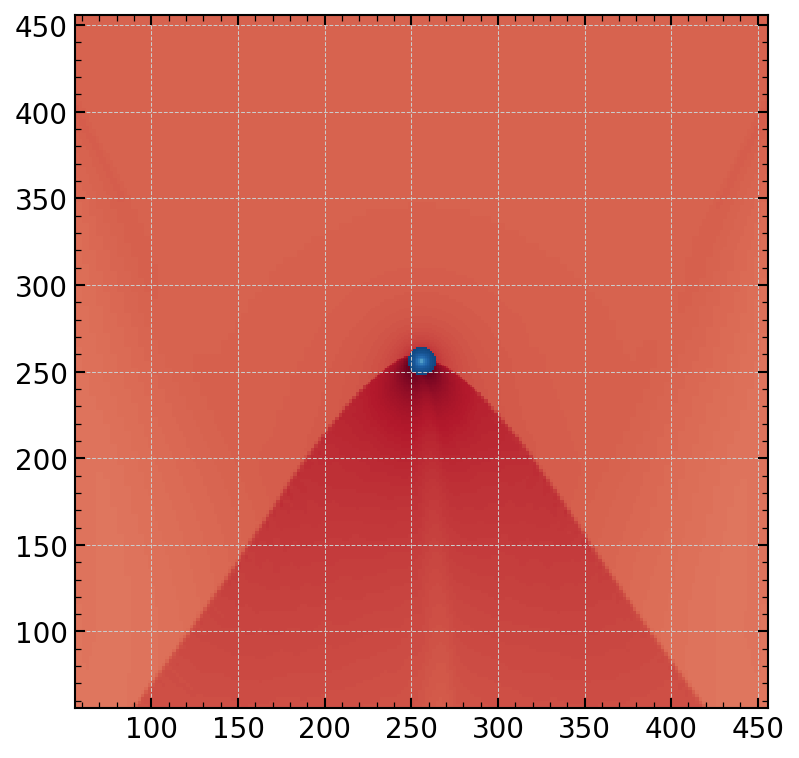

In [ ]:
ds = yt.load(data_dir)

max_level = ds.index.max_level

ref = int(np.prod(ds.ref_factors[0:max_level]))
low = ds.domain_left_edge
dims = ds.domain_dimensions * ref
nx, ny, nz = dims
print(dims)

cube = ds.covering_grid(max_level, left_edge=low, dims=dims, fields=fields_test)


rho = cube[("RHOSTAR")].d
bx = cube[("BX")].d
by = cube[("BY")].d
bz = cube[("BZ")].d
eps = cube[("EPS")].d
# rho = cube[irho].d
# u = cube[iu].d
nx, ny, nz = rho.shape
boxl=200

fig, ax = plt.subplots(dpi=150)

plt.P_colormesh(rho[:,:,nz//2], cmap="RdBu_r",norm=colors.LogNorm())
plt.xlim(nx//2-boxl, nx//2+boxl)
plt.ylim(ny//2-boxl, ny//2+boxl)
ax.set_aspect('equal')


In [ ]:
ds['STX']

KeyError: 'STX'

In [ ]:

region = ds.all_data()
seed_points = [region.center]
field = "BZ"  

# Calculate streamlines
# streamlines = yt.streamlines.Streamlines(ds, seed_points, field)

# Plot the streamlines
fig, ax = plt.subplots(figsize=(8, 8))

plt.streamplot(x,y,bx,by)


In [ ]:
print(seed_points)

[unyt_array([0., 0., 0.], 'code_length')]


yt : [INFO     ] 2024-01-04 11:38:43,598 Parameters: current_time              = 1470.01953125
yt : [INFO     ] 2024-01-04 11:38:43,598 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-01-04 11:38:43,599 Parameters: domain_left_edge          = [-100. -100. -100.]
yt : [INFO     ] 2024-01-04 11:38:43,599 Parameters: domain_right_edge         = [100. 100. 100.]


[512 512 512]


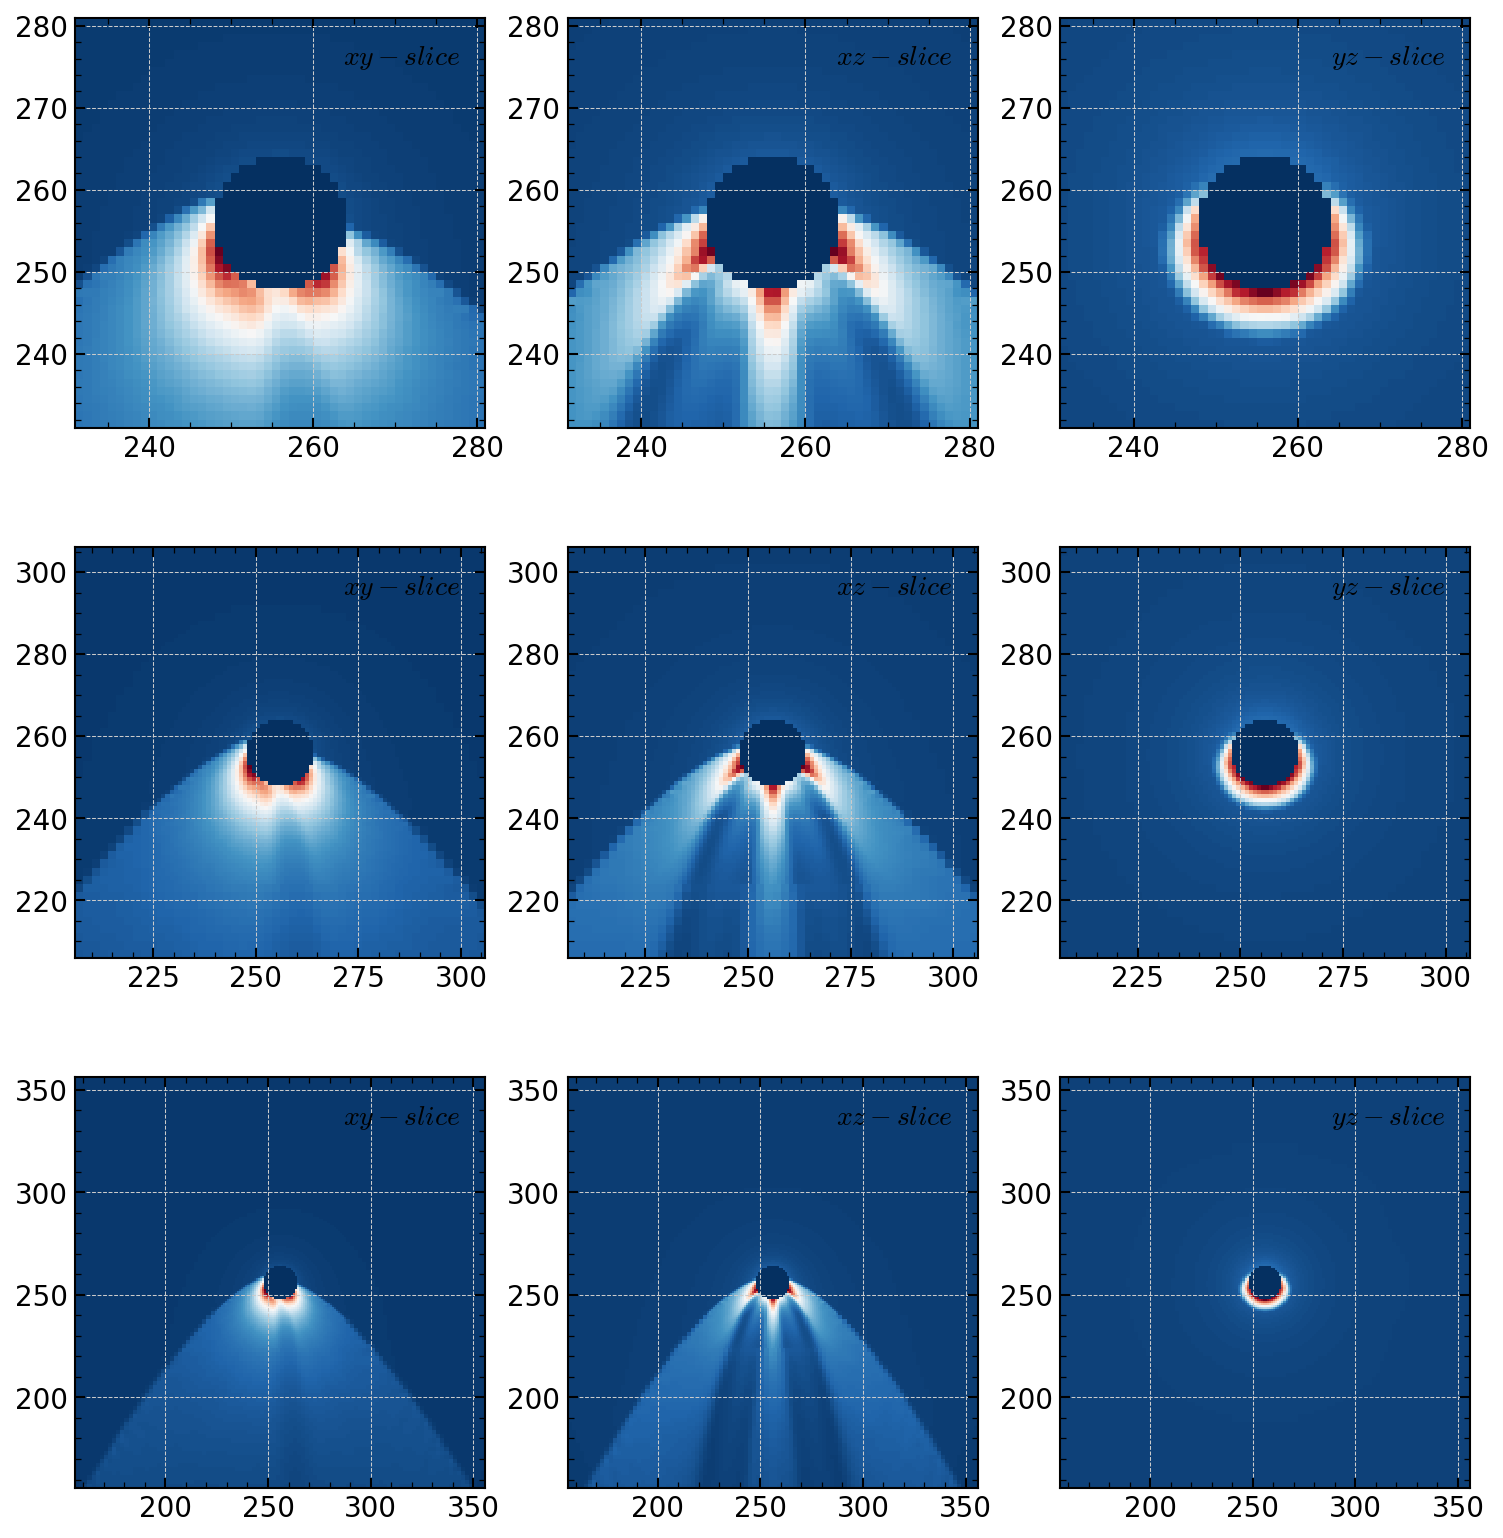

In [ ]:
ds = yt.load(data_dir)

max_level = ds.index.max_level

ref = int(np.prod(ds.ref_factors[0:max_level]))
low = ds.domain_left_edge
dims = ds.domain_dimensions * ref
nx, ny, nz = dims
print(dims)

cube = ds.covering_grid(max_level, left_edge=low, dims=dims, fields=fields_test)

rho = cube[("RHOSTAR")].d
# rho = cube[("RHOB")].d
# rho = cube[irho].d
# u = cube[iu].d
nx, ny, nz = rho.shape
boxl=150

fig, ax = plt.subplots(3,3,figsize=(12,13),dpi=150)

for irow, boxl in enumerate([25,50,100]):
    
    ax[irow,0].P_colormesh(rho[:,:,nz//2], cmap="RdBu_r",norm=colors.Normalize())
    ax[irow,0].set_xlim(nx//2-boxl, nx//2+boxl)
    ax[irow,0].set_ylim(ny//2-boxl, ny//2+boxl)
    ax[irow,0].set_aspect('equal')

    patch = mpatches.Patch(color=None, alpha=0.0,label=r'$xy-slice$')
    ax[irow,0].legend(handles=[patch],frameon=False)
    

    ax[irow,1].P_colormesh(rho[:,ny//2,:], cmap="RdBu_r",norm=colors.Normalize())
    ax[irow,1].set_xlim(nx//2-boxl, nx//2+boxl)
    ax[irow,1].set_ylim(ny//2-boxl, ny//2+boxl)
    ax[irow,1].set_aspect('equal')

    patch = mpatches.Patch(color=None, alpha=0.0,label=r'$xz-slice$')
    ax[irow,1].legend(handles=[patch],frameon=False)

    ax[irow,2].P_colormesh(rho[nx//2,:,:], cmap="RdBu_r",norm=colors.Normalize())
    ax[irow,2].set_xlim(nx//2-boxl, nx//2+boxl)
    ax[irow,2].set_ylim(ny//2-boxl, ny//2+boxl)
    ax[irow,2].set_aspect('equal')

    patch = mpatches.Patch(color=None, alpha=0.0,label=r'$yz-slice$')
    ax[irow,2].legend(handles=[patch],frameon=False)


In [ ]:
outdir ="./BHL-test/"

RRange = 5
Rticks = [-4,-2,0,2,4]
Rticklabels = [r'${%d}$'%i for ii, i in enumerate(Rticks)]

from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
# from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure( figsize = (13.7,7.2),dpi=75 )
gs = GridSpec(nrows=5, ncols=10, 
              wspace=0.00, hspace=0.00, 
              width_ratios=[0.08,0.45, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.1, 0.08], 
              height_ratios=[1.0, 1.0, 1.0, 0.35, 0.08])

ax_figDen = np.array([[fig.add_subplot(gs[j,i]) for ii,i in enumerate([2,3,4,5,6,7])] for jj,j in enumerate([0])])
ax_figDen = ax_figDen.flatten()

ax_figTemp = np.array([[fig.add_subplot(gs[j,i]) for ii,i in enumerate([2,3,4,5,6,7])] for jj,j in enumerate([1])])
ax_figTemp = ax_figTemp.flatten()

ax_figNu = np.array([[fig.add_subplot(gs[j,i]) for ii,i in enumerate([2,3,4,5,6,7])] for jj,j in enumerate([2])])
ax_figNu = ax_figNu.flatten()

ax_cbarDen = fig.add_subplot(gs[:-2,0])
ax_cbarTemp = fig.add_subplot(gs[:-2,9])
ax_cbarNu = fig.add_subplot(gs[4,2:-2])
        
fig_ID = 0

for ibeta, beta in enumerate(betavalue):
    
    ID = "t"+str(run[0])+"n"+str(run[1])+"b"+str(beta)
    FigID = "t"+str((int)(run[0]+1))+"n"+str((int)(run[1]+1))+"b"+str(beta)
    
    
    x, y = np.meshgrid(x_dat, y_dat)
    ax = np.array([ax_figDen[fig_ID],ax_figTemp[fig_ID],ax_figNu[fig_ID]])
    print(fig_ID,end=' ')
    fig_ID = fig_ID + 1
    sys.stdout.flush()
    
    imDen = ax[0].P_colormesh(x,y,rho[ibeta,irun,...]  ,cmap='RdBu_r',norm=colors.LogNorm(vmin=vminDen, vmax=vmaxDen))
    imTemp= ax[1].P_colormesh(x,y,temp[ibeta,irun,...] ,cmap='RdBu_r',norm=colors.LogNorm(vmin=vminTemp, vmax=vmaxTemp))
    imNu  = ax[2].P_colormesh(x,y,Nu[ibeta,irun,...]   ,cmap='RdBu_r',norm=colors.LogNorm(vmin=vminNu, vmax=vmaxNu))
    for i in range(3):
        ax[i].set_xlim(-RRange,RRange)
        ax[i].set_ylim(-RRange,RRange)
        ax[i].set_xticks(Rticks)
        ax[i].set_xticklabels([])
        ax[i].set_yticks(Rticks)
        ax[i].set_yticklabels([])
        ax[i].set_aspect("equal")

for i in range((int)(len(ax_figNu))):        
    ax_figNu[i].set_xticklabels(Rticklabels)
    
betatitle = [r'$\beta={%.1f}$'%beta for ibeta, beta in enumerate(betavalue)]
    
for i in range(6):
    ax_figDen[i].set_title(betatitle[i])
    
ax_figDen[0].set_ylabel(r'$\Sigma$',fontsize=18)
ax_figTemp[0].set_ylabel(r'$T$',fontsize=18)
ax_figNu[0].set_ylabel(r'$\nu$',fontsize=18)
  
cax = np.array([ax_cbarDen ,ax_cbarTemp ,ax_cbarNu])

cbarDen  = plt.colorbar(imDen  ,cax=cax[0])
cbarTemp = plt.colorbar(imTemp ,cax=cax[1])
cbarNu   = plt.colorbar(imNu   ,cax=cax[2],orientation='horizontal')

cax[0].set_title(r'$\Sigma$',fontsize=18)
cax[1].set_title(r'$T$',fontsize=18) 
cax[2].set_title(r'$\nu$',fontsize=18)

plt.savefig(outdir+"r-Gallery-subset4.png",dpi=550,bbox_inches = 'tight', pad_inches=0.05,transparent=True)

In [ ]:
2.0*np.pi/(3.0*)

243.49537983296517

In [ ]:
Mpc = 3.086e+22
km = 1000
yr = 365.25*24*60*60

th = 1.0/67.74/km*Mpc/(yr)/1e9

og = 0.6911
om = 0.3089

t1 = th/np.sqrt(og) * np.log((2)*(og/om) ** 1/2.0)*2.0/3.0

print(t1)

9.322339643409997


### BHL stripping of SMBH accretion disk

Ram pressure stripping follows $\tau_{str}=\frac{M}{\dot M} \sim \frac{R D}{v_{rel}}$

In [ ]:
Mpc = 3.086e+22
pc = 3.086e+16

km = 1000
yr = 365.25*24*60*60
M_sun = 1.989e30
G = 6.67430e-8

mp = 1.0

th = 1.0/67.74/km*Mpc/(yr)/1e9

og = 0.6911
om = 0.3089

t1 = th/np.sqrt(og) * np.log((2)*(og/om) ** 1/2.0)*2.0/3.0

print(t1)

9.322339643409997


In [ ]:
h = 0.05

### env parameters
rho_env = 1e6 * mp


### Primary BH Parameters
M_PBH = 1e8 * M_sun
R_PBHdisk = 1.0 * pc
rho_PBHdisk = 1e7 * mp
M_PBHdisk = np.pi*R_PBHdisk**3*0.05*rho_PBHdisk

### Secondary BH Parameters
M_SBH = 1e6 * M_sun
R_SBHdisk = np.array([0.01,0.1,1.0])* pc
rho_SBHdisk = np.array([1e8,10**(7.5),1e7]) * mp
M_SBHdisk = np.pi*R_SBHdisk**3*0.05*rho_SBHdisk

### Orbital Parameters
r_rot = np.array([10.0])*pc
v_rot = np.sqrt(G*M_PBH/r_rot)


tau_str = R_SBHdisk*(rho_SBHdisk/rho_env)/v_rot

inclination = np.array([1.0/6.0, 2.0/6.0, 3.0/6.0])*np.pi

for inc_ind, inc in enumerate(inclination):
    for r_ind, r in enumerate(R_SBHdisk):
      tau_inc = tau_str[r_ind]*np.sin(inc)
      print('inc = {%.2f}'%(inc/np.pi), ' , r_s/pc = {%e}'%(r/pc),' ,tau_str = {%.2e}'%(tau_inc/yr))

    print('')


inc = {0.17}  , r_s/pc = {1.000000e-02}  ,tau_str = {7.45e+01}
inc = {0.17}  , r_s/pc = {1.000000e-01}  ,tau_str = {2.36e+02}
inc = {0.17}  , r_s/pc = {1.000000e+00}  ,tau_str = {7.45e+02}

inc = {0.33}  , r_s/pc = {1.000000e-02}  ,tau_str = {1.29e+02}
inc = {0.33}  , r_s/pc = {1.000000e-01}  ,tau_str = {4.08e+02}
inc = {0.33}  , r_s/pc = {1.000000e+00}  ,tau_str = {1.29e+03}

inc = {0.50}  , r_s/pc = {1.000000e-02}  ,tau_str = {1.49e+02}
inc = {0.50}  , r_s/pc = {1.000000e-01}  ,tau_str = {4.71e+02}
inc = {0.50}  , r_s/pc = {1.000000e+00}  ,tau_str = {1.49e+03}



In [ ]:
oooor = 5.670374419 * 10.0**(-8) * 2.726**4
oooom = 

In [ ]:
(1-1.0/np.sqrt(1101))/(1-1.0/np.sqrt(1001))

1.0015175019783258

In [ ]:
yr = 365.25*24*60*60

5*1e50 /100*yr

1.5778799999999999e+56

In [ ]:
Msun = 1.989e30
5*10**48 *10**(-7)/ (0.5 * (500*1000)**2) / (Msun)

2.0110608345902463

In [ ]:
5*1e48 / 3.846e43

130005.20020800833

In [ ]:
G = 6.67430e-11
Mbh = 1e12/300.0*Msun
Vgal = 500*1000
pc = 3.085677581467192e16

rc = G*Mbh/Vgal**2
rc/pc

c = 299792458
E = 0.1*Mbh*c**2
E

5.9587468350251e+55

In [ ]:
Rgal = 10000*pc
(Rgal*Vgal**4)/2/G

1.4447571194110206e+53

In [ ]:
5.96*100/1.44

413.8888888888889

In [ ]:
Mgal = 1e12*Msun

Mgal*c*G/(3000.0*2*Rgal*Vgal)

42992174295.14831

In [ ]:
aa = 2*(6*10**(-2))**(-2.0/3.0)

aa = 2
1.5/100/(1+2)
print('%e'%(2.5*10**11/(0.97/0.14)))

3.608247e+10


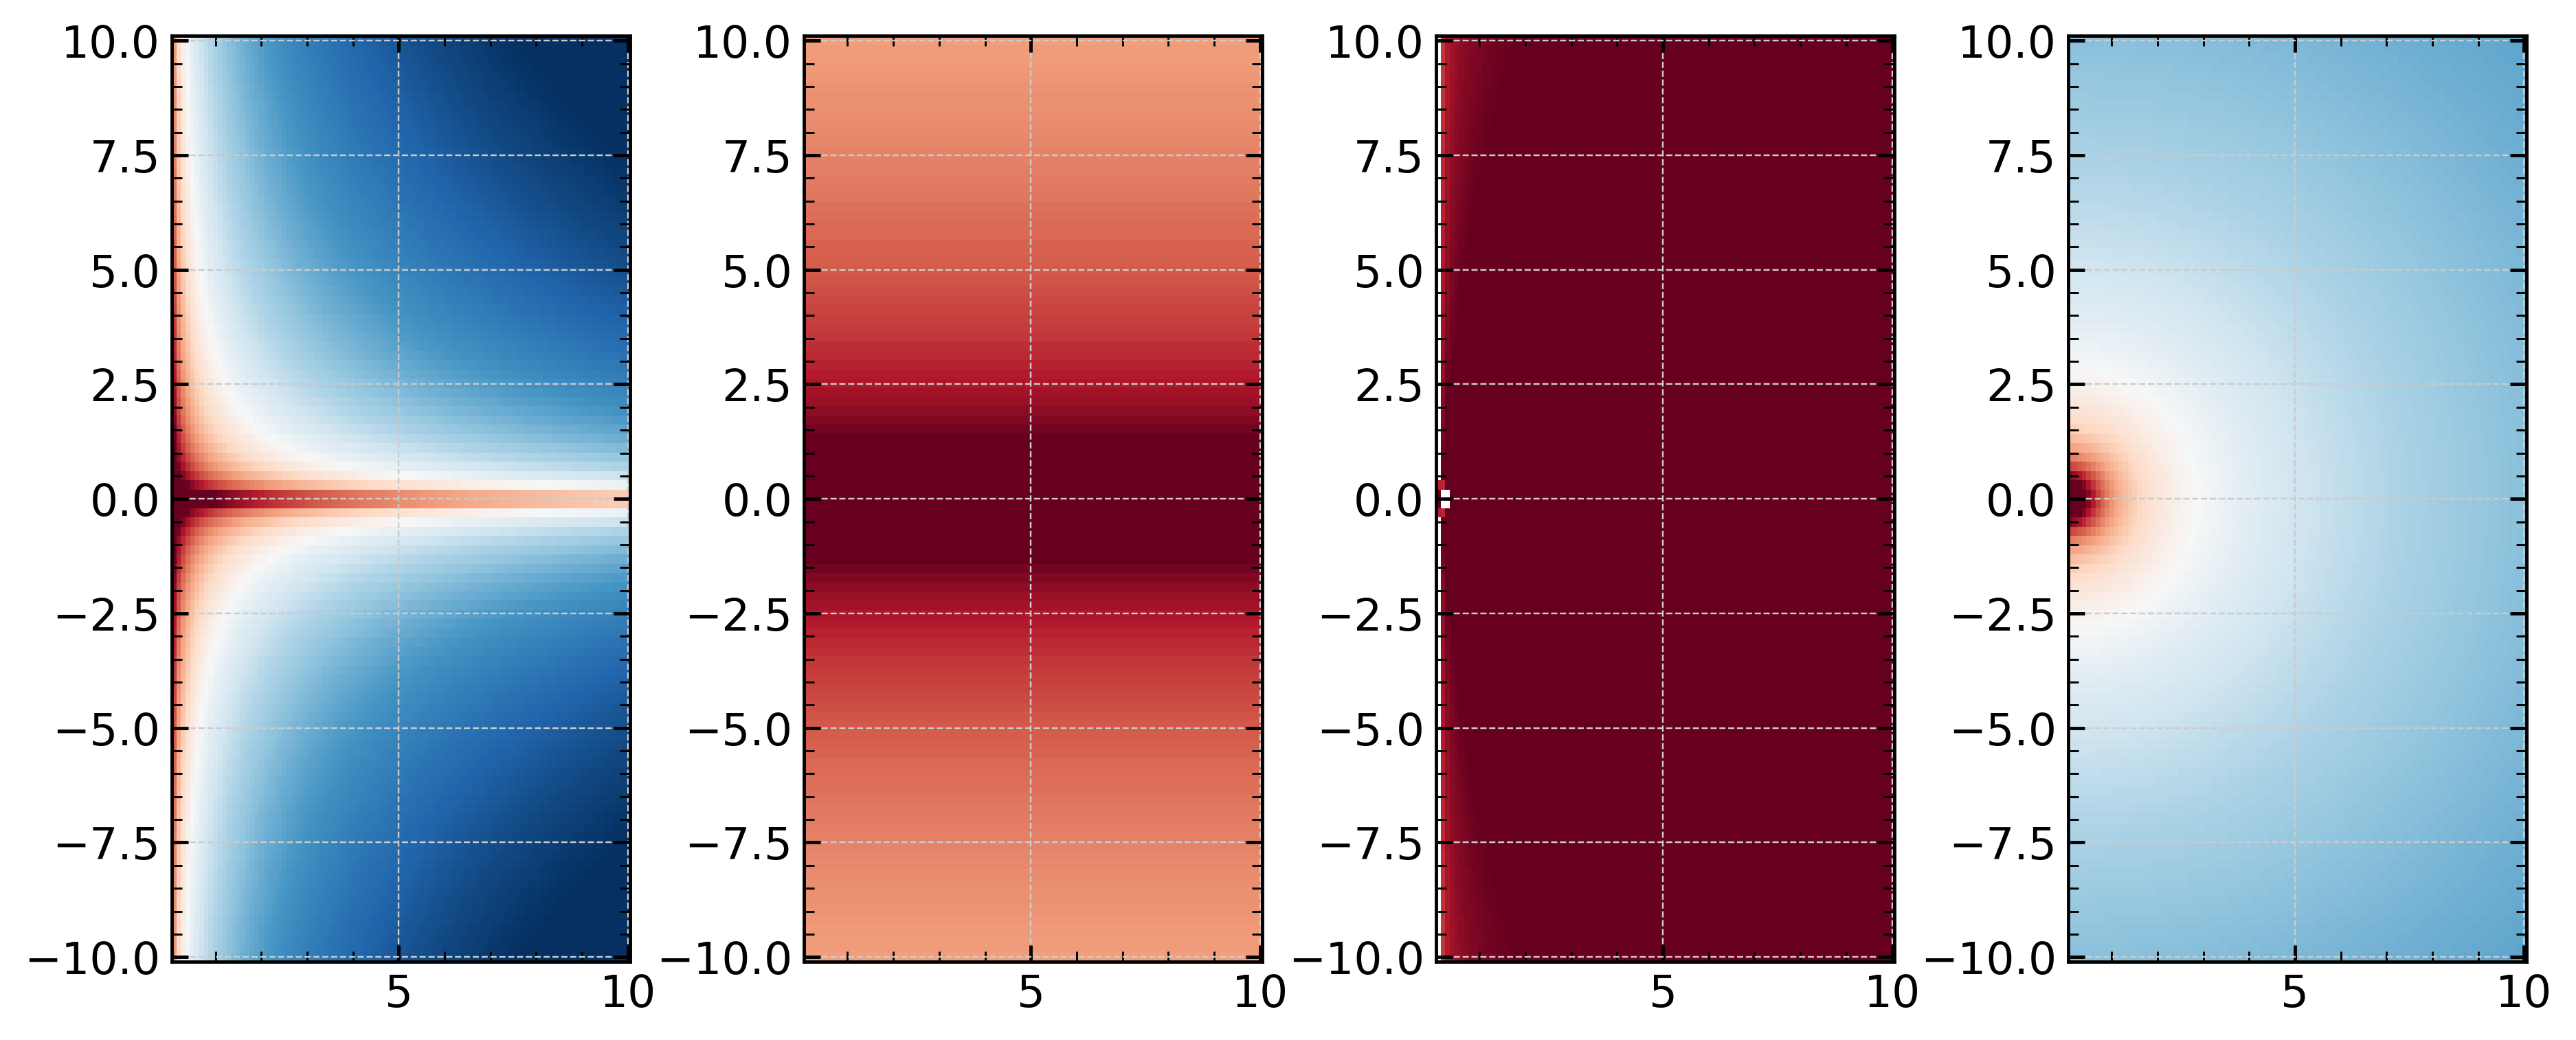

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(13,5),dpi=350)

rad = np.linspace(0.1,10,100)
z = np.linspace(-10,10,100)
rad, z = np.meshgrid(rad,z)
r = np.sqrt(rad**2+z**2)
# theta = np.linspace(0,2*np.pi,100)
# rad, theta = np.meshgrid(rad,theta)

rho_fl = 1e-6
Rad0 = 1.0
rmin = 0.1
p, q = -2.25, -0.5
rho0 = rho_fl * (rad/Rad0)**p * (1/z**2) 
rho1 = rho_fl * (rmin/Rad0)**p * (1/z**2)
rho2 = rho_fl * (rad/Rad0)**q * (1/z**2) * (5.0-2.0*(r-rmin)/rmin) * (1.0+4.0*(rmin-rad)/rmin)
rho3 = rho_fl * (r/Rad0)**p + 1.33*rho_fl * (r/Rad0)**(-5.5)

#   denfloor = dfloor * std::pow((r/cbd.rad0),(cbd.diskp)) + 1.33*dfloor * std::pow((rmin/cbd.rad0),(-5.5));
ax[0].pcolormesh(rad,z,rho0,cmap='RdBu_r',norm=colors.LogNorm(vmin=1e-10, vmax=1e-4))
ax[1].pcolormesh(rad,z,rho1,cmap='RdBu_r',norm=colors.LogNorm(vmin=1e-10, vmax=1e-4))
ax[2].pcolormesh(rad,z,rho2,cmap='RdBu_r',norm=colors.LogNorm(vmin=1e-10, vmax=1e-4))
ax[3].pcolormesh(rad,z,rho3,cmap='RdBu_r',norm=colors.LogNorm(vmin=1e-10, vmax=1e-4))

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[2].set_aspect('equal')
ax[3].set_aspect('equal')


In [1]:
13.97 + 12.91 + 14.99 + 13.97 + 12.96 + 13.91 + 14.99 + 11.91 + 11.90

121.51